In [2]:
# Necessary libraries are imported.
import pandas as pd
import json

### Easy #1

In [3]:
# Json file is read and converted to data frame.
df_raw = pd.read_json('dim_customer.json')
df = pd.DataFrame(df_raw)

# Program counts the number of unique entires on the id list.
customers = len(pd.unique(df['id']))

print('Number of unique customers: ', customers)

Number of unique customers:  5191


### Easy #2

In [4]:
# Csv file is read and converted to data frame.
df2_raw = pd.read_csv('fct_invoice.csv')
df2 = pd.DataFrame(df2_raw)

# Program lists the number of unique categories.
categories = len(pd.unique(df2['category']))

print('Number of unique categories: ', categories)

# Program counts the number of unique categories.
category_list = df2['category'].unique()

print('Unique product categories: ', category_list)

Number of unique categories:  8
Unique product categories:  ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


### Easy #3

In [5]:
# Program finds most common entry on the list of payment methods.
most_used_payment = df2['payment_method'].mode()[0]

# Program counts the number of times that payment method was used.
payment_uses = df2['payment_method'].value_counts()[most_used_payment]

print('Most used payment method: ', most_used_payment)
print('Number of times method was used: ', payment_uses)

Most used payment method:  Cash
Number of times method was used:  44447


### Medium 1

In [6]:
# Sales is calculated by multiplying price and quantity sold.
df2['sales'] = df2['quantity'] * df2['price']

# The sum of sales per category is determined.
data_by_category = df2.groupby('category')['sales'].agg('sum')

# The three highest selling categories are printed.
top_selling = data_by_category.nlargest(3)

print(top_selling)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


### Medium 2

In [7]:
# The two data sets are joined together using the shared id variable.
df2['id'] = df2['customer_id']
df3 = pd.merge(df2, df, on=['id'])

# A new data frame is made filtering based on age. The sum of sales is obtained.
df3_over45 = df3[df3['age'] > 45]
sales_over45 = df3_over45['sales'].sum()

print('Sales from customers over age 45: ', sales_over45)

Sales from customers over age 45:  82039768.15


### Medium 3

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26776\3038482064.py:6: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  df3['invoice_date'] = pd.to_datetime(df3['invoice_date'], format='%d/%m')


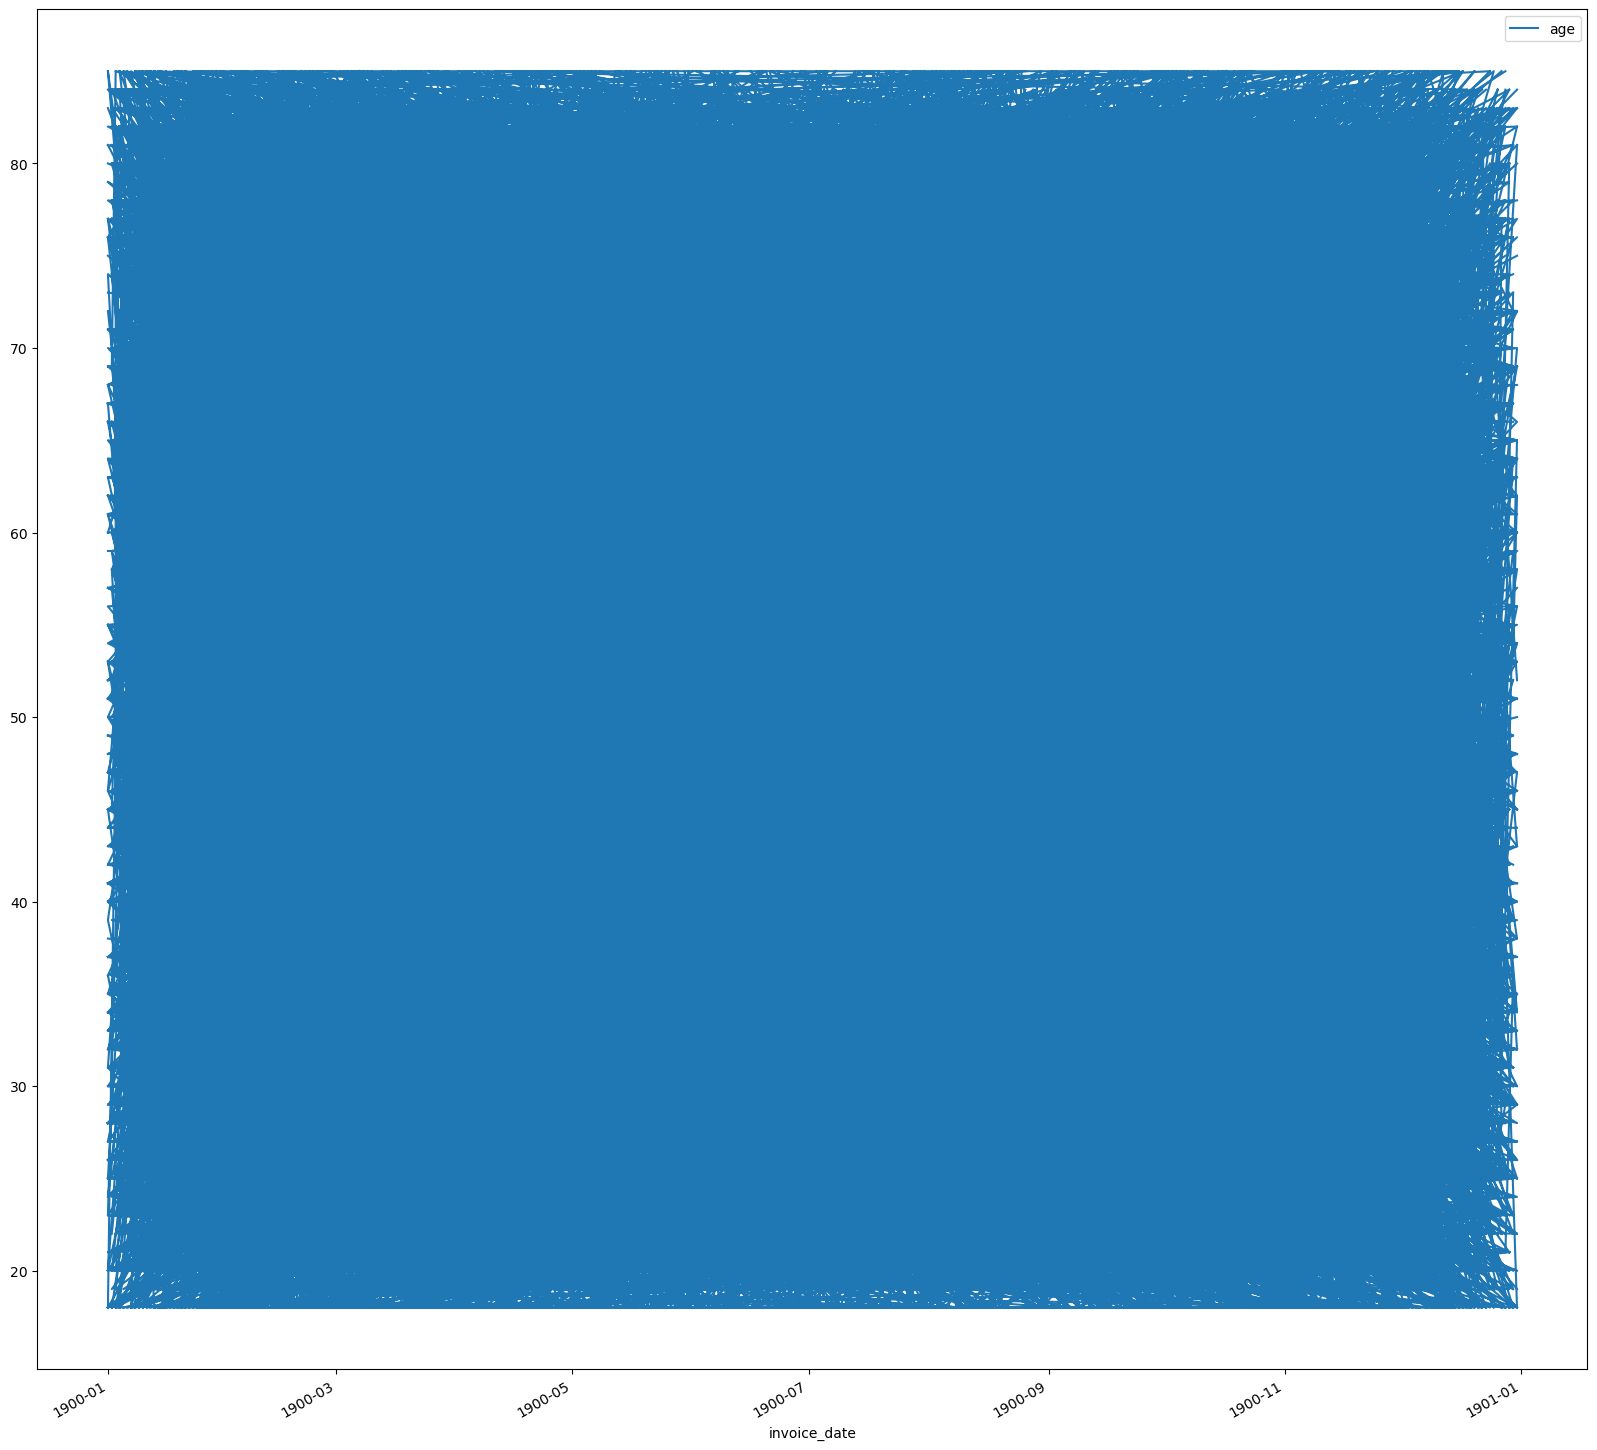

In [8]:
# Necessary library is imported.
import matplotlib.pyplot as plt

# Dates entries are converted to time variables.
df3['invoice_date'] = df3['invoice_date'].astype(str).str[:-5]
df3['invoice_date'] = pd.to_datetime(df3['invoice_date'], format='%d/%m')

# Graph is plotted determining the age of the consumer during the day they shop.
df3.plot(x='invoice_date', y='age', figsize=(20,20))

plt.show()
# No trends could be observed from the graph.

### Hard 1

In [10]:
# Sorts all of the ages into an age group.
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df3['age_groups'] = pd.cut(df3['age'], bins=bins, labels=labels, right=False)

# Table is created that adds together the sales from an age group given a specific product category.
df4 = pd.pivot_table(df3, values='sales', index=['category', 'age_groups'], aggfunc='sum')

# Entire table is displayed.
pd.set_option('display.max_rows', None)
print(df4)

                                  sales
category        age_groups             
Books           0-9                0.00
                10-19          12801.75
                20-29          79461.75
                30-39          84143.10
                40-49          87203.40
                50-59          74962.20
                60-69          80476.80
                70-79          54827.85
                80-89          26664.00
                90-99              0.00
Clothing        0-9                0.00
                10-19        1927413.84
                20-29       10250732.80
                30-39       11354126.96
                40-49       11215189.92
                50-59       10321851.76
                60-69       10660642.08
                70-79        7769371.28
                80-89        4493698.00
                90-99              0.00
Cosmetics       0-9                0.00
                10-19         109619.36
                20-29         605915.32


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26776\1781035257.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df4 = pd.pivot_table(df3, values='sales', index=['category', 'age_groups'], aggfunc='sum')
